0.7673654391
0.9840970637
0.9790707571
0.6748533473
0.2847390552
0.8506110283
0.8366331607
0.05888335198
0.8934935941
0.8360280659
0.874864105
0.7107597378
0.9978763568
0.0001064849324
0.7053101784
0.2326345609
0.01590293626
0.02092924291
0.3251466527
0.7152609448
0.1493889717
0.1633668393
0.941116648
0.1065064059
0.1639719341
0.125135895
0.2892402622
0.002123643228
0.9998935151
0.2946898216
[[7.67365439e+01 9.84097064e+01 9.79070757e+01 6.74853347e+01
  2.84739055e+01 8.50611028e+01 8.36633161e+01 5.88833520e+00
  8.93493594e+01 8.36028066e+01 8.74864105e+01 7.10759738e+01
  9.97876357e+01 1.06484932e-02 7.05310178e+01]
 [2.32634561e+01 1.59029363e+00 2.09292429e+00 3.25146653e+01
  7.15260945e+01 1.49388972e+01 1.63366839e+01 9.41116648e+01
  1.06506406e+01 1.63971934e+01 1.25135895e+01 2.89240262e+01
  2.12364323e-01 9.99893515e+01 2.94689822e+01]]


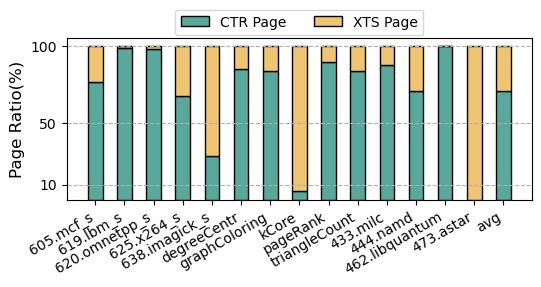

In [10]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl



xlabels=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','462.libquantum','473.astar','avg'
]
ylabels='Page Ratio(%)'

n = 15    # number of test systems
x = np.arange(n) 

wb = openpyxl.load_workbook(filename="pageRatio.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value * 100)     
        print(value)            
b1=b1.reshape(2, 15)
print(b1)
     
width=0.5
stack_labels = ['CTR Page', 'XTS Page']
colors = ['#59a89c', '#f0c571', '#C00000', '#FF0000', '#B9D4E7', '#FFC000']

allfigsize=(6,2.1)  
plt.figure(figsize=allfigsize)
bottom = np.zeros(n)
# m = len(stack_labels)
m = 2
for i in range(m):
    plt.bar(x, b1[i], width, bottom=bottom,label=stack_labels[i], color=colors[i], edgecolor='black', linewidth=1)    
    bottom += b1[i]

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xlabels, fontsize=10, rotation=30,ha='right', va='top')  
plt.yticks([10,50,100],fontsize=10)
plt.ylabel(ylabels,fontsize=12)    
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.22), fontsize=10)    
plt.savefig('PageRatio.pdf',bbox_inches = 'tight')    
plt.show()